In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json

In [67]:
file = 'memory-footprint/collectionsizes.json'

folder = '../results/EMSE/'
output_folder = 'C:/Users/Artur/Google Drive/Academy/Projects/2018 4 Journal Empirical Study Java Collections/2018 ESEM Journal/repo/16259492rykqhjrhsdyk/figs'


df = pd.read_json(os.path.join(folder, file))

In [58]:
import re
bmatch = re.compile(r"^de.heidelberg.pvs.container_bench.benchmarks\.([a-z0-9.]+)\.([A-Z][A-Za-z0-9]+)\.([a-zA-Z0-9_.]+)$")

def normalize_benchmark(df):
    fullbench = df.benchmark
    match = bmatch.match(fullbench)
    df['bench_id'] = match[1]
    df['class'] = match[2]
    df['clazz'] = match[2]
    df['method'] = match[3]
    return df

In [16]:
def aggregate_memory_stats(df):
    df['numentries'] = df['secondaryMetrics']['numentries']['score']
    df['tablesizemax'] = df['secondaryMetrics']['tablesizemax']['score']
    df['tablesizesum'] = df['secondaryMetrics']['tablesizesum']['score']
    df['totalmemory'] = df['secondaryMetrics']['totalmemory']['score']

    return df

In [24]:
EMPTY = '_'

def normalize_params(df):
    
    params = df.params
    if 'impl' in params:
        df['impl'] = params['impl']
    else:
        df['impl'] = df['benchmark'].split('.')[-2]
    
    if 'payloadType' in params:
        df['payloadType'] = params['payloadType']
    else:
        df['payloadType'] = EMPTY
        
    if 'workload' in params:
        df['workload'] = params['workload']
    else:
        df['workload'] = EMPTY
    
    df['size'] = params['size']
        
    return df

In [18]:
# Delete expensive metrics
del aggr_df['primaryMetric']
del aggr_df['secondaryMetrics']

In [59]:
aggr_df = df.apply(aggregate_memory_stats, axis=1)
aggr_df = aggr_df.apply(normalize_params, axis=1)
aggr_df = aggr_df.apply(normalize_benchmark, axis=1)


# Serialize into disk
aggr_df.to_csv(os.path.join(folder, 'aggregated-memory.csv'))

In [33]:
allimpl = aggr_df.impl.unique() 

hashimpl = list(filter(lambda x: '_HASH' in x or 'QHASH' in x, allimpl))

arrayimpl = list(filter(lambda x: '_ARRAY' in x, allimpl))
linkedimpl = list(filter(lambda x: '_LINKED' in x, allimpl))
sortedimpl = list(filter(lambda x: 'RB' in x or 'TREE' in x or 'AVL' in x, allimpl))

map_primitives = list(filter(lambda x: 'O2I' in x, allimpl))

### Plot Hash Variants

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


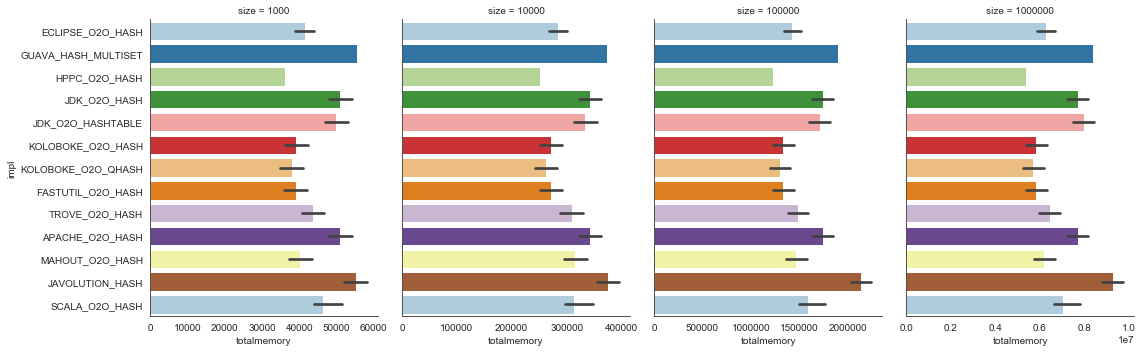

In [86]:
import seaborn as sns

clazz = 'GetPut'

sns.set_style('white')
clrs = sns.color_palette("Paired")
plt.clf()
hash_df = aggr_df.query('impl in @hashimpl and impl not in @map_primitives')

sns.catplot(data=hash_df, x='totalmemory', y='impl', orient='h', kind='bar', col='size', sharex=False, palette=clrs, aspect=.8)
plt.savefig(os.path.join(output_folder, 'totalmemory-wordcount-hash.pdf'))
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


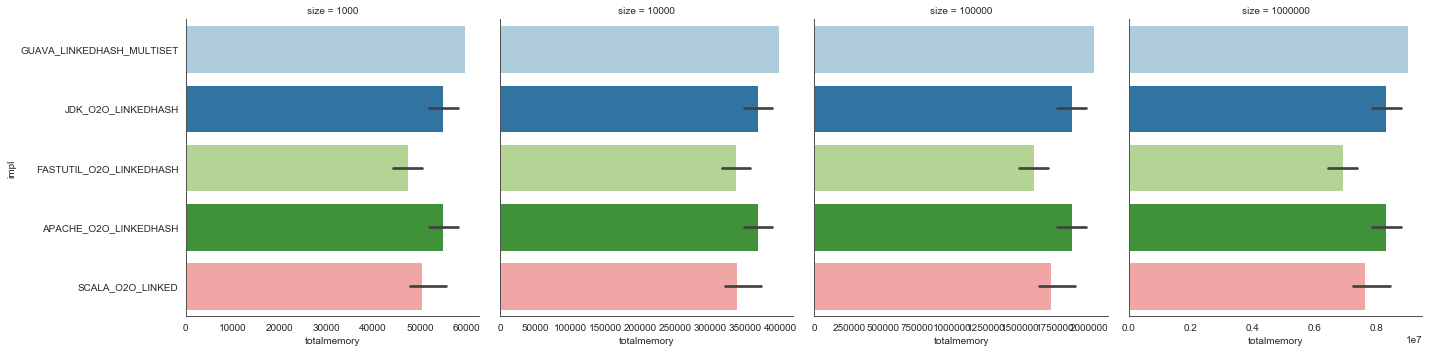

In [83]:
sns.set_style('white')
clrs = sns.color_palette("Paired")
plt.clf()
hash_df = aggr_df.query('impl in @linkedimpl and impl not in @map_primitives')

sns.catplot(data=hash_df, x='totalmemory', y='impl', orient='h', kind='bar', col='size', sharex=False, palette=clrs)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'totalmemory-wordcount-linked.pdf'))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


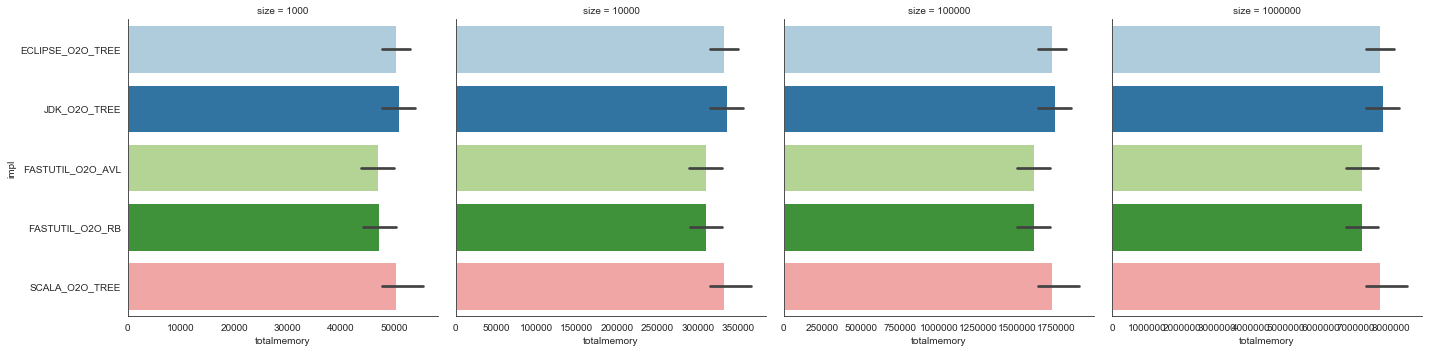

In [75]:
sns.set_style('white')
clrs = sns.color_palette("Paired")
plt.clf()
hash_df = aggr_df.query('impl in @sortedimpl and impl not in @map_primitives')

sns.catplot(data=hash_df, x='totalmemory', y='impl', orient='h', kind='bar', col='size', sharex=False, palette=clrs)
plt.savefig(os.path.join(output_folder, 'totalmemory-wordcount-sorted.pdf'))
plt.show()